# Adding Muon Flux to Normalized Gamma Background (vz0)

#### Din-Ammar Tolj - Y25
Maruyama Group, Summer 2023

This notebook is a continuation of "SmearingProject_MuonsAndGammaSim_Din_vz5" and "Gamma_Normalization_Din_vz1" that adds the smeared muon flux in the former to the normalized gamma background in the latter.  

### Import needed libraries 

In [1]:
import numpy as np

import ROOT
from ROOT import *
from root_numpy import array2hist, hist2array, fill_hist

import sys
import math

import os
import scipy
import pandas as pd
import seaborn as sns

import ctypes
from ctypes import *

from datetime import datetime
from glob import glob

%cd /home/dt592/Geant4Work/gamma_sim/gamma_sim-build
from dt5202 import dt5202_crunch # Import parser that Tom wrote. This is containted in the file named dt5202.py in this folder.
from dt5202oldDAQ import dt5202_crunch as dt5202_crunch_oldDAQ # Old ver

from langaus import LanGausFit 
%cd -

import gamma_normalize
import warnings
warnings.filterwarnings("ignore")

Welcome to JupyROOT 6.24/02
/vast/palmer/home.grace/dt592/Geant4Work/gamma_sim/gamma_sim-build
/vast/palmer/home.grace/dt592/Geant4Work


### Run the two inherited Jupyter Notebooks

In [2]:
%%capture

%run /home/dt592/Geant4Work/SemaringProject_MuonsAndGammaSim_Din_vz5.ipynb
%run /home/dt592/Geant4Work/Gamma_Normalization_Din_vz1.ipynb

### Add smeared muons flux to lin. smeared normalized gammas

In [10]:
f1 = np.random.normal(loc=np.array(energyDeposited1460) * pe_mev, scale = 0.01 * lin_sigma_pe * np.array(energyDeposited1460) * pe_mev)/pe_mev
f2 = np.random.normal(loc=np.array(energyDeposited2614) * pe_mev, scale = 0.01 * lin_sigma_pe * np.array(energyDeposited2614) * pe_mev)/pe_mev
f3 = np.random.normal(loc=np.array(energyDeposited1120) * pe_mev, scale = 0.01 * lin_sigma_pe * np.array(energyDeposited1120) * pe_mev)/pe_mev
f4 = np.random.normal(loc=np.array(energyDeposited1238) * pe_mev, scale = 0.01 * lin_sigma_pe * np.array(energyDeposited1238) * pe_mev)/pe_mev
f5 = np.random.normal(loc=np.array(energyDeposited1764) * pe_mev, scale = 0.01 * lin_sigma_pe * np.array(energyDeposited1764) * pe_mev)/pe_mev
f6 = np.random.normal(loc=np.array(energyDeposited968) * pe_mev, scale = 0.01 * lin_sigma_pe * np.array(energyDeposited968) * pe_mev)/pe_mev
f7 = np.random.normal(loc=np.array(energyDeposited934) * pe_mev, scale = 0.01 * lin_sigma_pe * np.array(energyDeposited934) * pe_mev)/pe_mev
f8 = np.random.normal(loc=np.array(energyDeposited911) * pe_mev, scale = 0.01 * lin_sigma_pe * np.array(energyDeposited911) * pe_mev)/pe_mev
f9 = np.random.normal(loc=np.array(energyDeposited609) * pe_mev, scale = 0.01 * lin_sigma_pe * np.array(energyDeposited609) * pe_mev)/pe_mev
f10 = np.random.normal(loc=np.array(energyDeposited583) * pe_mev, scale = 0.01 * lin_sigma_pe * np.array(energyDeposited583) * pe_mev)/pe_mev

In [11]:
isittrue = np.concatenate((0.366140 * f1, 0.107000 * f2, 8.28749e-02 * f3, 2.85593e-06 * f4, 4.37133e-02 * f5, 2.01552e-07 * f6, 3.03455e-07 * f7, 1.67261e-01 * f8, 1.71318e-07 * f9, 2.32949e-01 * f10))

Warning in <TFile::Append>: Replacing existing TH1: bestie (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


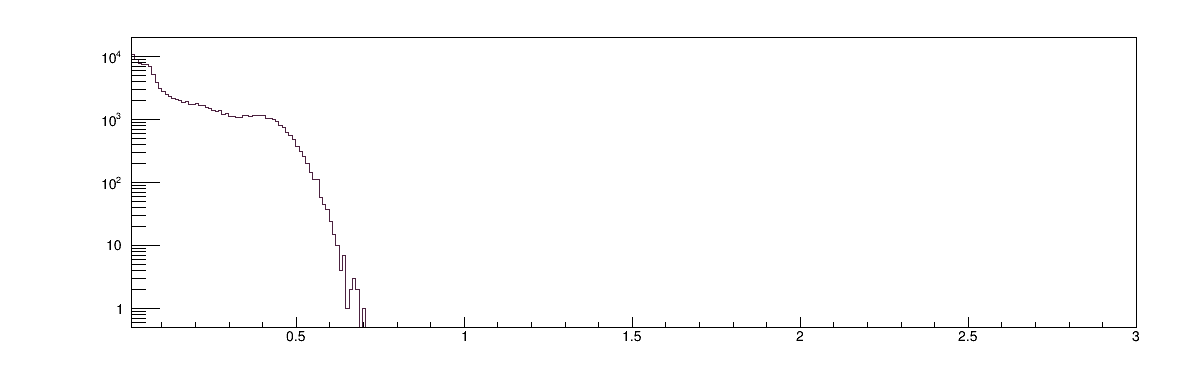

In [14]:
bestie = TH1D('bestie','',300,0.01,3)
fill_hist(bestie,isittrue)

c1 = TCanvas('c1','',1200,400)
c1.cd()

gStyle.SetPalette(kCandy)

gPad.SetLogy()
gStyle.SetStatFontSize(.08)
gStyle.SetTitleFontSize(0.085)
gStyle.SetStatW(0.4)

bestie.Draw("plc pmc hist")

c1.Draw()

In [20]:
test = TH1D('test','',134,2.7,15)
fill_hist(test,bg_smeared_lin_mu_pe/pe_mev)

h_fsp = TH1F('h_fsp','',134,0.5,15)
# tots.GetXaxis().SetLimits(0.5,15)
# smeared_lin_mu_th.GetXaxis().SetLimits(0.5,15)

# tots.Add(smeared_lin_mu_th)

l = TList()
l.Add(test)
l.Add(tots)

h_fsp.Reset()
h_fsp.Merge(l)

# tots.Add(test)

-1

Warning in <TFile::Append>: Replacing existing TH1: test (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_fsp (Potential memory leak).
Error in <Merge>: Cannot merge histograms - limits are inconsistent:
 first: h_fsp (134, 0.500000, 15.000000), second: test (134, 2.700000, 15.000000)


In [15]:
fill_hist(tots, bg_smeared_lin_mu_pe/pe_mev)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


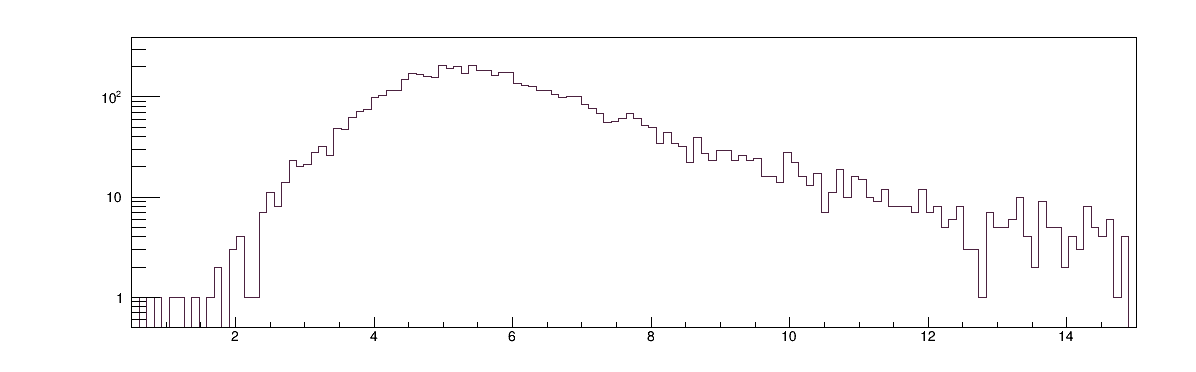

In [12]:
c1 = TCanvas('c1','',1200,400)
c1.cd()

gStyle.SetPalette(kCandy)

gPad.SetLogy()
gStyle.SetStatFontSize(.08)
gStyle.SetTitleFontSize(0.085)
gStyle.SetStatW(0.4)

# tots.Draw("plc pmc hist")
test.Draw("plc pmc hist")
# smeared_lin_mu_th.GetXaxis().SetRangeUser(0.01,15)
# tots.SetAxisRange(0.01,15,"X")

# h_dat.Draw("plc pmc hist")
# h_dat.GetXaxis().SetLimits(0.5,15)

# h_fsp.SetLineWidth(4)
# h_fsp.Draw("hist same")
# h_dat.SetLineWidth(2)

# c1.Clear()

# rp = TRatioPlot(h_fsp,h_dat)
# rp.Draw()

# rp.GetLowerRefYaxis().SetTitle("Ratio")
# rp.GetUpperRefYaxis().SetTitle("Counts/bin")
# rp.GetUpperRefYaxis().SetTitleOffset(0.7)
# rp.GetLowerRefYaxis().SetTitleOffset(0.7)
# rp.GetLowerRefYaxis().SetRangeUser(-1,3)

# rp.GetLowerRefYaxis().SetLabelSize(.04)
# rp.GetLowerRefYaxis().SetTitleSize(.05)
# rp.GetUpperRefYaxis().SetLabelSize(.04)
# rp.GetUpperRefYaxis().SetTitleSize(.05)
# rp.GetLowerRefXaxis().SetLabelSize(.05)
# rp.GetLowerRefXaxis().SetTitleSize(.045)

# chi2 = " #chi^{2}/ndf = " + str(round(h_fsp.Chi2Test(h_dat, "CHI2/NDF"), 8)) + " "

# legend = TLegend(0.57,0.73,0.88,0.89)
# legend.AddEntry(h_dat,"Lab data (swirly panel)","le")
# legend.AddEntry(tots,"Smeared sim. (lin.)","l")
# legend.Draw()

# title = TPaveText(0.14, 0.395, 0.47, 0.50, "NDC")
# title.AddText(chi2)
# title.SetMargin(0.05)
# title.SetBorderSize(1)
# title.SetFillColor(0)
# title.Draw()

c1.Draw()